# Project ARI3205 Interpretable AI for Deep Learning Models *(Part 2)*
---

**Name:** Sean David Muscat 

**ID No:** 0172004L

---


# First install lime package

In [1]:
%pip install lime --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Sean Muscat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Then install shap package

In [2]:
%pip install shap --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Sean Muscat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Then install anchors package

In [3]:
%pip install anchor-exp

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Sean Muscat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Check and install required libraries from the libraries.json file
import json

# Read the libraries from the text file
with open('../Libraries/Part1_Lib.json', 'r') as file:
    libraries = json.load(file)

# ANSI escape codes for colored output
GREEN = "\033[92m"  # Green text
RED = "\033[91m"    # Red text
RESET = "\033[0m"   # Reset to default color

# Function to check and install libraries
def check_and_install_libraries(libraries):
    for lib, import_name in libraries.items():
        try:
            # Attempt to import the library
            __import__(import_name)
            print(f"[{GREEN}✔{RESET}] Library '{lib}' is already installed.")
        except ImportError:
            # If import fails, try to install the library
            print(f"[{RED}✖{RESET}] Library '{lib}' is not installed. Installing...")
            %pip install {lib}

# Execute the function to check and install libraries
check_and_install_libraries(libraries)

# Import necessary libraries for data analysis and modeling
import warnings                                                                     # Disable warnings
import pandas as pd                                                                 # Data manipulation and analysis                #type: ignore
import numpy as np                                                                  # Numerical computations                        #type: ignore
import matplotlib.pyplot as plt                                                     # Data visualization                            #type: ignore
import seaborn as sns                                                               # Statistical data visualization                #type: ignore
import statsmodels.formula.api as smf                                               # Statistical models                            #type: ignore
from sklearn.model_selection import train_test_split                                # Train-test split                              #type: ignore
from tensorflow.keras.models import Sequential                                      # Neural network model                          #type: ignore
from tensorflow.keras.layers import Dense, Input                                    # Neural network layers                         #type: ignore                                                               
from tensorflow.keras.optimizers import Adam                                        # Neural network optimizer                      #type: ignore
from sklearn.preprocessing import StandardScaler,  OneHotEncoder                    # Data scaling                                  #type: ignore
from sklearn.impute import SimpleImputer                                            # Missing value imputation                      #type: ignore
from sklearn.inspection import PartialDependenceDisplay, permutation_importance     # Feature importance                            #type: ignore
from alibi.explainers import ALE, plot_ale                                          # ALE plots                                     #type: ignore
from sklearn.neural_network import MLPClassifier                                    # Neural network classifier                     #type: ignore
from sklearn.metrics import accuracy_score                                          # Model evaluation                              #type: ignore
import statsmodels.api as sm                                                        # Statistical models                            #type: ignore
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
from anchor import utils
from anchor import anchor_tabular

# Suppress specific warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names") 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

[✔] Library 'tensorflow' is already installed.
[✔] Library 'scikit-learn' is already installed.
[✔] Library 'matplotlib' is already installed.
[✔] Library 'seaborn' is already installed.
[✔] Library 'pandas' is already installed.
[✔] Library 'numpy' is already installed.
[✔] Library 'scipy' is already installed.


C:\Users\Sean Muscat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



[✔] Library 'alibi' is already installed.


In [5]:
# Define the filenames
train_filename = '../Datasets/Titanic/train.csv'
test_filename = '../Datasets/Titanic/test.csv'
gender_submission_filename = '../Datasets/Titanic/gender_submission.csv'

# Load the datasets
try:
    train_data = pd.read_csv(train_filename)
    test_data = pd.read_csv(test_filename)
    gender_submission_data = pd.read_csv(gender_submission_filename)
    print(f"'{train_filename}' dataset loaded successfully.")
    print(f"'{test_filename}' dataset loaded successfully.")
    print(f"'{gender_submission_filename}' dataset loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e.filename} was not found. Please ensure it is in the correct directory.")
    exit()
except pd.errors.EmptyDataError as e:
    print(f"Error: {e.filename} is empty.")
    exit()
except pd.errors.ParserError as e:
    print(f"Error: There was a problem parsing {e.filename}. Please check the file format.")
    exit()

# Dataset insights
print("\nTrain Dataset Overview:")
print(train_data.info())
print("\nTrain Dataset Statistical Summary:")
print(train_data.describe())

print("\nTest Dataset Overview:")
print(test_data.info())
print("\nTest Dataset Statistical Summary:")
print(test_data.describe())

print("\nGender Submission Dataset Overview:")
print(gender_submission_data.info())

'../Datasets/Titanic/train.csv' dataset loaded successfully.
'../Datasets/Titanic/test.csv' dataset loaded successfully.
'../Datasets/Titanic/gender_submission.csv' dataset loaded successfully.

Train Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Train Dataset Stati

## Feed-Forward Neural Network

In [6]:
# Load the Titanic dataset
train_data = pd.read_csv('../Datasets/Titanic/train.csv')

# Preprocessing
# Separate features and target
y = train_data['Survived']  # Target
X = train_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Features

# Handle categorical variables with one-hot encoding
categorical_features = ['Sex', 'Embarked']
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = one_hot_encoder.fit_transform(X[categorical_features])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and append the encoded columns
X = X.drop(columns=categorical_features)
X = pd.concat([X.reset_index(drop=True), categorical_encoded_df.reset_index(drop=True)], axis=1)

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (712, 11)
Test data shape: (179, 11)


In [7]:
# Build the feed-forward neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6186 - loss: 0.6670 - val_accuracy: 0.7413 - val_loss: 0.5374
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7509 - loss: 0.5485 - val_accuracy: 0.8322 - val_loss: 0.4636
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7638 - loss: 0.4965 - val_accuracy: 0.8252 - val_loss: 0.4271
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7700 - loss: 0.4759 - val_accuracy: 0.8322 - val_loss: 0.4144
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8066 - loss: 0.4442 - val_accuracy: 0.8252 - val_loss: 0.4067
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7969 - loss: 0.4316 - val_accuracy: 0.8322 - val_loss: 0.4051
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7854 - loss: 0.4581 - val_accuracy: 0.8182 - val_loss: 0.3985
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8095 - loss: 0.4355 - val_accuracy: 0.8182 - val_loss

## Surrogate Model - MLPClassifier

In [8]:
# Train a surrogate model (MLPClassifier)
surrogate_model = MLPClassifier(hidden_layer_sizes=(32,), activation='logistic', random_state=1, max_iter=1000).fit(X_train, y_train)
print('Accuracy (MLPClassifier): ' + str(surrogate_model.score(X_train, y_train)))

Accuracy (MLPClassifier): 0.800561797752809


# PART 2.1

### Set up the LIME explainer

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Available label for Survived instance: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


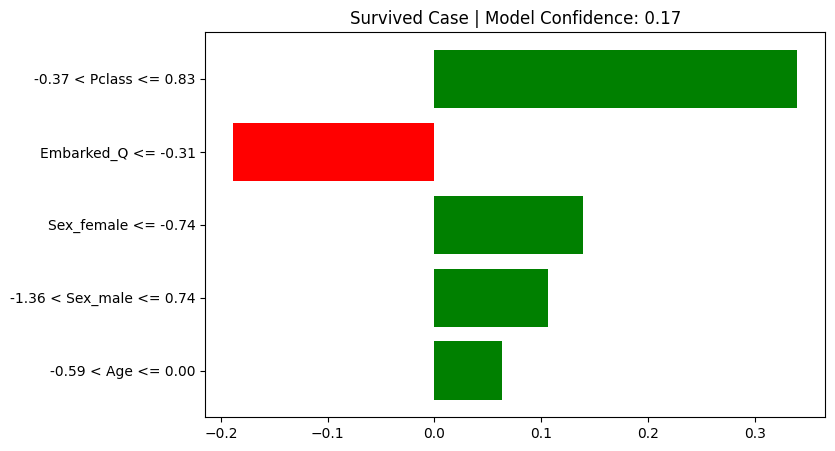

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
Available label for Not Survived instance: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


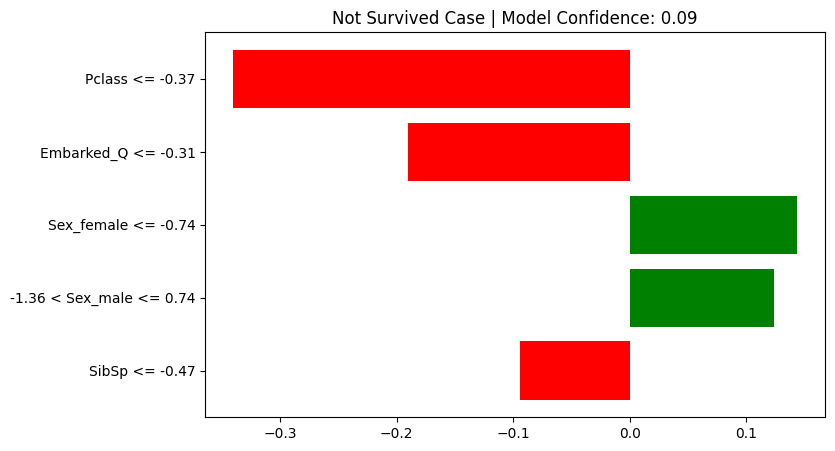

In [9]:
# Function to visualize LIME explanations as a bar plot
def lime_exp_as_pyplot(exp, label=1, figsize=(8, 5)):
    exp_list = exp.as_list(label=label)
    fig, ax = plt.subplots(figsize=figsize)
    
    # Extract feature names and importance values
    vals = [x[1] for x in exp_list]
    names = [x[0] for x in exp_list]
    
    # Reverse for descending order of feature importance
    vals.reverse()
    names.reverse()
    
    # Color the bars: green for positive, red for negative
    colors = ['green' if x > 0 else 'red' for x in vals]
    
    # Positions for the bars
    pos = np.arange(len(exp_list)) + .5
    
    # Plot the bars
    ax.barh(pos, vals, align='center', color=colors)
    plt.yticks(pos, names)
    
    return fig, ax

# Wrap the Keras model's prediction function for LIME
def predict_proba(X):
    """Custom function for LIME to get model predictions."""
    prob_class_1 = model.predict(X)  # Predicted probability for class 1
    prob_class_0 = 1 - prob_class_1  # Predicted probability for class 0
    return np.hstack((prob_class_0, prob_class_1))  # Combine probabilities

# Initialize the LIME Tabular Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.to_numpy(),
    feature_names=X_train.columns.to_list(),
    class_names=['Not Survived', 'Survived'],
    discretize_continuous=True,
    random_state=42
)

# Example instance index for "Survived" and "Not Survived"
survived_idx = np.where(y_test.to_numpy() == 1)[0][0]
not_survived_idx = np.where(y_test.to_numpy() == 0)[0][0]

# Explanation for "Survived" instance
survived_exp = explainer.explain_instance(
    X_test.iloc[survived_idx].to_numpy(),
    predict_proba,
    num_features=5,
    top_labels=1
)

# Dynamically find the label for "Survived" instance
available_label = list(survived_exp.local_exp.keys())[0]  # Pick the first available label
print(f"Available label for Survived instance: {available_label}")

# Visualize explanation for the "Survived" instance
f, ax = lime_exp_as_pyplot(survived_exp, label=available_label)
survived_confidence = model.predict(X_test.iloc[survived_idx:survived_idx + 1].to_numpy())[0][available_label]
ax.set_title(f'Survived Case | Model Confidence: {survived_confidence:.2f}')
plt.show()

# Explanation for "Not Survived" instance
not_survived_exp = explainer.explain_instance(
    X_test.iloc[not_survived_idx].to_numpy(),
    predict_proba,
    num_features=5,
    top_labels=1
)

# Dynamically find the label for "Not Survived" instance
available_label = list(not_survived_exp.local_exp.keys())[0]  # Pick the first available label
print(f"Available label for Not Survived instance: {available_label}")

# Visualize explanation for the "Not Survived" instance
f, ax = lime_exp_as_pyplot(not_survived_exp, label=available_label)
not_survived_confidence = model.predict(X_test.iloc[not_survived_idx:not_survived_idx + 1].to_numpy())[0][available_label]
ax.set_title(f'Not Survived Case | Model Confidence: {not_survived_confidence:.2f}')
plt.show()

# Part 2.2

### Adding SHAP to Explain Model Predictions

In [10]:
# Use SHAP's DeepExplainer for neural networks
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Use a small sample of the training data to explain the model

# Calculate SHAP values for a set of instances
shap_values = explainer.shap_values(X_test[:10])  # Explaining the first 10 samples of the test set

# Visualize the SHAP values for the first test sample (e.g., index 0)
shap.initjs()

# Reshape SHAP values if necessary
shap_values_reshaped = shap_values[0].reshape(1, -1)

# Now plot with reshaped values
shap.force_plot(
    explainer.expected_value[0],
    shap_values_reshaped[0],  # SHAP values for the first sample (class 0)
    X_test.iloc[0],           # Actual features for the first sample
    feature_names=X.columns  # Feature names
)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 767us/step


 10%|█         | 1/10 [00:08<01:18,  8.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 798us/step


 20%|██        | 2/10 [00:16<01:07,  8.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 770us/step


 30%|███       | 3/10 [00:25<00:57,  8.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 732us/step


 40%|████      | 4/10 [00:33<00:48,  8.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 786us/step


 50%|█████     | 5/10 [00:41<00:40,  8.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 764us/step


 60%|██████    | 6/10 [00:49<00:32,  8.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 778us/step


 70%|███████   | 7/10 [00:57<00:24,  8.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 787us/step


 80%|████████  | 8/10 [01:05<00:16,  8.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 731us/step


 90%|█████████ | 9/10 [01:13<00:08,  8.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 5s 769us/step


100%|██████████| 10/10 [01:21<00:00,  8.16s/it]


# Part 2.3

### Implementing Anchors to interpret model predictions in specific cases

In [17]:
# Define the explainer
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    class_names=['Not Survived', 'Survived'],  # Adjust based on the binary target
    feature_names=X.columns.tolist(),
    train_data=X_train.values,  # Use training data for the explainer
    categorical_names={i: one_hot_encoder.categories_[i] for i in range(len(categorical_features))}
)

# Define the prediction function for the neural network
pred_fn = lambda x: surrogate_model.predict(x)

# Select an instance to explain (example: first test instance)
instance_to_explain = X_test.iloc[0].values

# Explain the instance using Anchors
exp = anchor_explainer.explain_instance(
    instance_to_explain,
    pred_fn,
    threshold=0.95
)

# Display the results
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())
exp.show_in_notebook()

Anchor: Sex_female <= -0.74 AND Pclass = female
Precision: 0.98
Coverage: 0.40
